In [97]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
!pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
target = raw_df.values[1::2, 2]
boston_data = pd.DataFrame(data)
boston_data




,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [101]:
# составляем матрицу А и вектор целевой переменной
CRIM = boston_data[0]
RM = boston_data[5]
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[13]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


In [102]:
# проверим размерность
print(A.shape)
## (506, 3)

(506, 3)


In [103]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

[-29.24471945  -0.26491325   8.39106825]


In [104]:
# добавились новые данные:
CRIM_new = 0.2
RM_new = 6
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat[0]+w_hat[1]*CRIM_new+w_hat[2]*RM_new
print(PRICE_new)

21.048707376403353


In [105]:
w_hat_new = ([-29.3,-0.26, 8.4])
crim = 0.2
rm = 6
price_new = w_hat_new[0]+w_hat_new[1]*crim+w_hat_new[2]*rm
price_new


21.048000000000005

In [114]:
boston_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [115]:
boston_data[[3,12,0,5]].describe()

,3,12,0,5
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


In [120]:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[[3,12,0,5]]))
y = boston_data[13]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

[-1.92052548  3.9975594  -0.58240212 -0.09739445  5.07554248]


In [126]:
x = np.array([12,8])
x_cent = x - x.mean()
x_st = x_cent/np.linalg.norm(x_cent)
x_st.round(3)

array([ 0.707, -0.707])

In [127]:
x_1 = np.array([5,1,2])
x_2 = np.array([4,2,8])
np.corrcoef(x_1, x_2)

array([[1.        , 0.05241424],
       [0.05241424, 1.        ]])

In [142]:
x_1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x_2 = np.array([10.2,  3.7, 4.1, 20.5, 24.2, 24.1])
x_3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
A = np.array([x_1,x_2,x_3])
G = np.corrcoef(A)
np.linalg.det(G)



4.862298229241645e-07

In [143]:
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 1],
    [1, 9, 4, 1]
]).T
y = np.array([4, 5, 2, 2])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

[2.4        0.46666667 0.13333333]


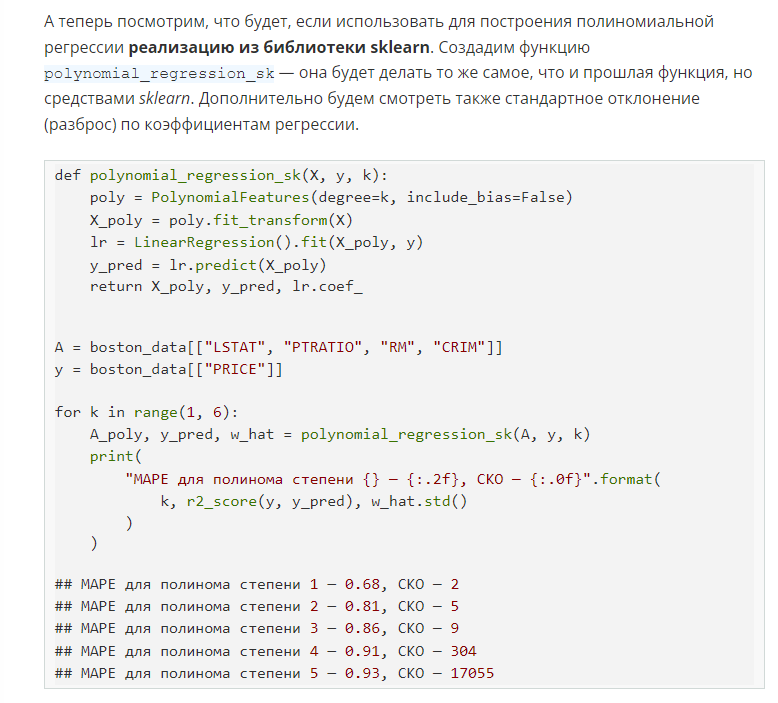

In [152]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


A = np.array([1,3,-2,9]).T.reshape(-1,1)

poly = PolynomialFeatures(degree=2, include_bias=True)
A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2
0,1.0,1.0,1.0
1,1.0,3.0,9.0
2,1.0,-2.0,4.0
3,1.0,9.0,81.0


In [162]:
X = np.array([1,3,-2,9]).reshape(-1,1)
y = np.array([3,7,-5,21])
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)
lr = LinearRegression().fit(x_poly, y)
y_pred = lr.predict(x_poly)
lr.intercept_

0.11446012972148178

In [172]:
A = np.array([
    [1,1,1,1,1],
    [5,9,4,3,5],
    [15,18,18,19,19],
    [7,6,7,7,7]
]).T
y = np.array([24,22,35,33,36]).T
E = np.eye(4)
alpha = 1
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
w_hat_ridge


array([-0.08523045, -1.70784126,  1.91141216,  0.7293992 ])